## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [3]:

Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)
X_train=train[:,1:3]
y_train=train[:,0]
X_test=test[:,1:3]
y_test=test[:,0]

def LDA(X_train,y_train):
    #on commence par initialiser les tableaux qui vont recevoir les valeurs des paramètres
    pi=np.zeros(np.unique(y_train).shape[0])
    mu=np.zeros((np.unique(y_train).shape[0],X_train.shape[1]))
    sigma= np.zeros((X_train.shape[1],X_train.shape[1]))
    for i in range(np.unique(y_train).shape[0]):
        #on les remplit avec les formules du cours
        pi[i]=np.sum(y_train==i+1)/y_train.shape[0]
        mu[i]=np.mean(X_train[y_train==i+1],axis=0)
        sigma+=np.cov(X_train[y_train==i+1].T)   
    
    return pi,mu,sigma/len(y_train)

def QDA(X_train,y_train):# excatement comme la fonction précédentes mais en suivant les formules du cours pour la qda cette fois-ci
    pi=np.zeros(np.unique(y_train).shape[0])
    mu=np.zeros((np.unique(y_train).shape[0],X_train.shape[1]))
    sigma=np.zeros((np.unique(y_train).shape[0],X_train.shape[1],X_train.shape[1]))
    for i in range(np.unique(y_train).shape[0]):
        pi[i]=np.sum(y_train==i+1)/y_train.shape[0]
        mu[i]=np.mean(X_train[y_train==i+1],axis=0)
        sigma[i]=np.dot((X_train[y_train==i+1]-mu[i]).T,(X_train[y_train==i+1]-mu[i]))/np.sum(y_train==i+1)
    return pi,mu,sigma

def predict_qda(X_test,pi,mu,sigma):
    pred=np.zeros(X_test.shape[0]) # tableaux qui contiendra les prédictions
    for i in range(X_test.shape[0]):
        val=[]
        for k in range(len(pi)):#calcul des valeurs de la fonction discriminante pour chaque classe
            val.append(-1/2*np.dot((X_test[i]-mu[k]).T,np.dot(la.inv(sigma[k]),(X_test[i]-mu[k])))+np.log(pi[k])-1/2*np.log(la.det(sigma[k])))
        pred[i]=np.argmax(val)+1 # on prend la classe qui maximise la fonction discriminante + 1 pour correspondre a nos labels
    return pred

def predict_lda(X_test,pi,mu,sigma):# pareil que précédemment mais en suivant les formules du cours pour la lda
    pred=np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        val=[]
        for k in range(len(pi)):
            val.append(np.dot(X_test[i].T,np.dot(la.inv(sigma),(mu[k])))-1/2*np.dot(mu[k].T,np.dot(la.inv(sigma),(mu[k])))+np.log(pi[k]))
        pred[i]=np.argmax(val)+1
    return pred


def compute_error(y_pred,y_test):#on calcule le taux d 'erreur classiquement
    return np.sum(y_pred!=y_test)/y_test.shape[0]


#on applique le tout et on affiche les erreurs pour le train et le test
pi_lda,mu_lda,sigma_lda=LDA(X_train,y_train)
pi_qda,mu_qda,sigma_qda=QDA(X_train,y_train)
pred_train_lda=predict_lda(X_train,pi_lda,mu_lda,sigma_lda)
pred_test_lda=predict_lda(X_test,pi_lda,mu_lda,sigma_lda)
pred_train_qda=predict_qda(X_train,pi_qda,mu_qda,sigma_qda)
pred_test_qda=predict_qda(X_test,pi_qda,mu_qda,sigma_qda)
error_train_lda=compute_error(pred_train_lda,y_train)
error_test_lda=compute_error(pred_test_lda,y_test)
error_train_qda=compute_error(pred_train_qda,y_train)
error_test_qda=compute_error(pred_test_qda,y_test)
print("error_train_lda",error_train_lda)
print("error_test_lda",error_test_lda)
print("error_train_qda",error_train_qda)
print("error_test_qda",error_test_qda)


error_train_lda 0.04
error_test_lda 0.06
error_train_qda 0.05
error_test_qda 0.05


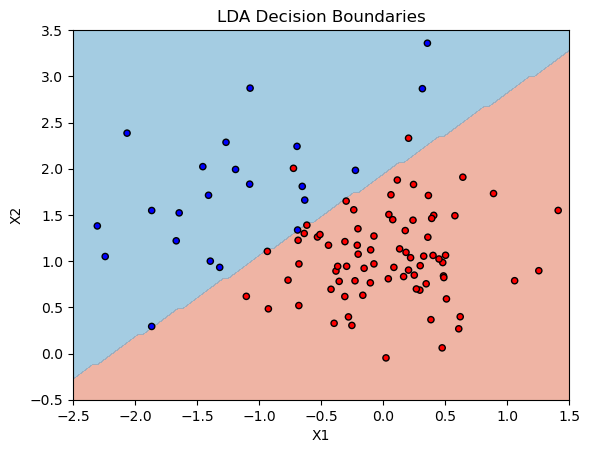

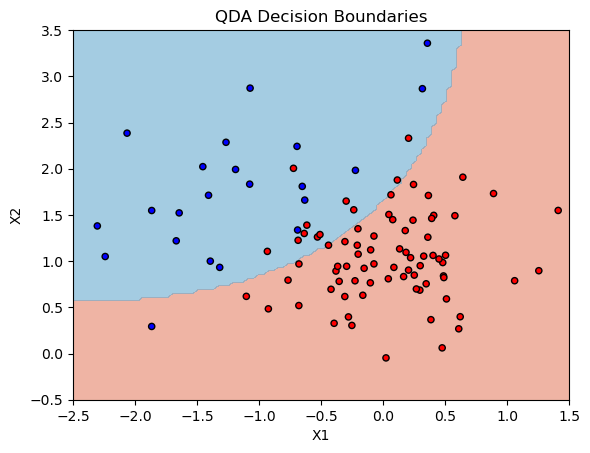

In [14]:

# Define functions for LDA and QDA decision boundaries
grid = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)# ja i redéfini la grille dans ce format pour pouvoir l'utiliser dans les fonctions suivantes plus simplement

def decision_boundary_lda(x, pi, mu, sigma):#fonction qui calcule les prédictions pour chaque point de la grille, presque identique à celles ci-avant
    Y=np.zeros((len(x)))
    for k in range(len(x)):
        res=[]
        for j in range(len(pi)):
            res.append(np.dot(x[k].T,np.dot(la.inv(sigma),(mu[j])))-1/2*np.dot(mu[j].T,np.dot(la.inv(sigma),(mu[j])))+np.log(pi[j]))
        Y[k]=np.argmax(res)+1
    return Y

def decision_boundary_qda(x, pi, mu, sigma):
    Y=np.zeros((len(x)))
    for k in range(len(x)):
        res=[]
        for j in range(len(pi)):
            res.append(-1/2*np.dot((x[k]-mu[j]).T,np.dot(la.inv(sigma[j]),(x[k]-mu[j])))+np.log(pi[j])-1/2*np.log(la.det(sigma[j])))
        Y[k]=np.argmax(res)+1
    return Y

# Create the decision boundary arrays
class_lda = decision_boundary_lda(grid, pi_lda, mu_lda, sigma_lda) 
class_qda = decision_boundary_qda(grid, pi_qda, mu_qda, sigma_qda)

# on remet la grille sous forme de 'grille'
class_lda = class_lda.reshape(Nx2, Nx1)
class_qda = class_qda.reshape(Nx2, Nx1)

# Create a contour plot for LDA decision boundaries
plt.contourf(x1, x2, class_lda, levels=np.arange(np.min(class_lda)-0.5, np.max(class_lda)+1.5, 1), cmap='RdBu', alpha=0.6)

# Overlay the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundaries')
plt.show()

# Create a contour plot for QDA decision boundaries
plt.contourf(x1, x2, class_qda, levels=np.arange(np.min(class_qda)-0.5, np.max(class_qda)+1.5, 1), cmap='RdBu', alpha=0.6)

# Overlay the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundaries')
plt.show()


> La LDA donne bien une frontière linéaire, elle correspond bien à ce qu'un humain tracerai à l'oeil nu. De même pour la QDA, on obtient une frontière quadratique comme attendu.

error for k= 1 is 0.065
error for k= 2 is 0.06
error for k= 3 is 0.045
error for k= 4 is 0.05
error for k= 5 is 0.06
error for k= 6 is 0.055
error for k= 7 is 0.07
error for k= 8 is 0.07
error for k= 9 is 0.075
error for k= 10 is 0.075


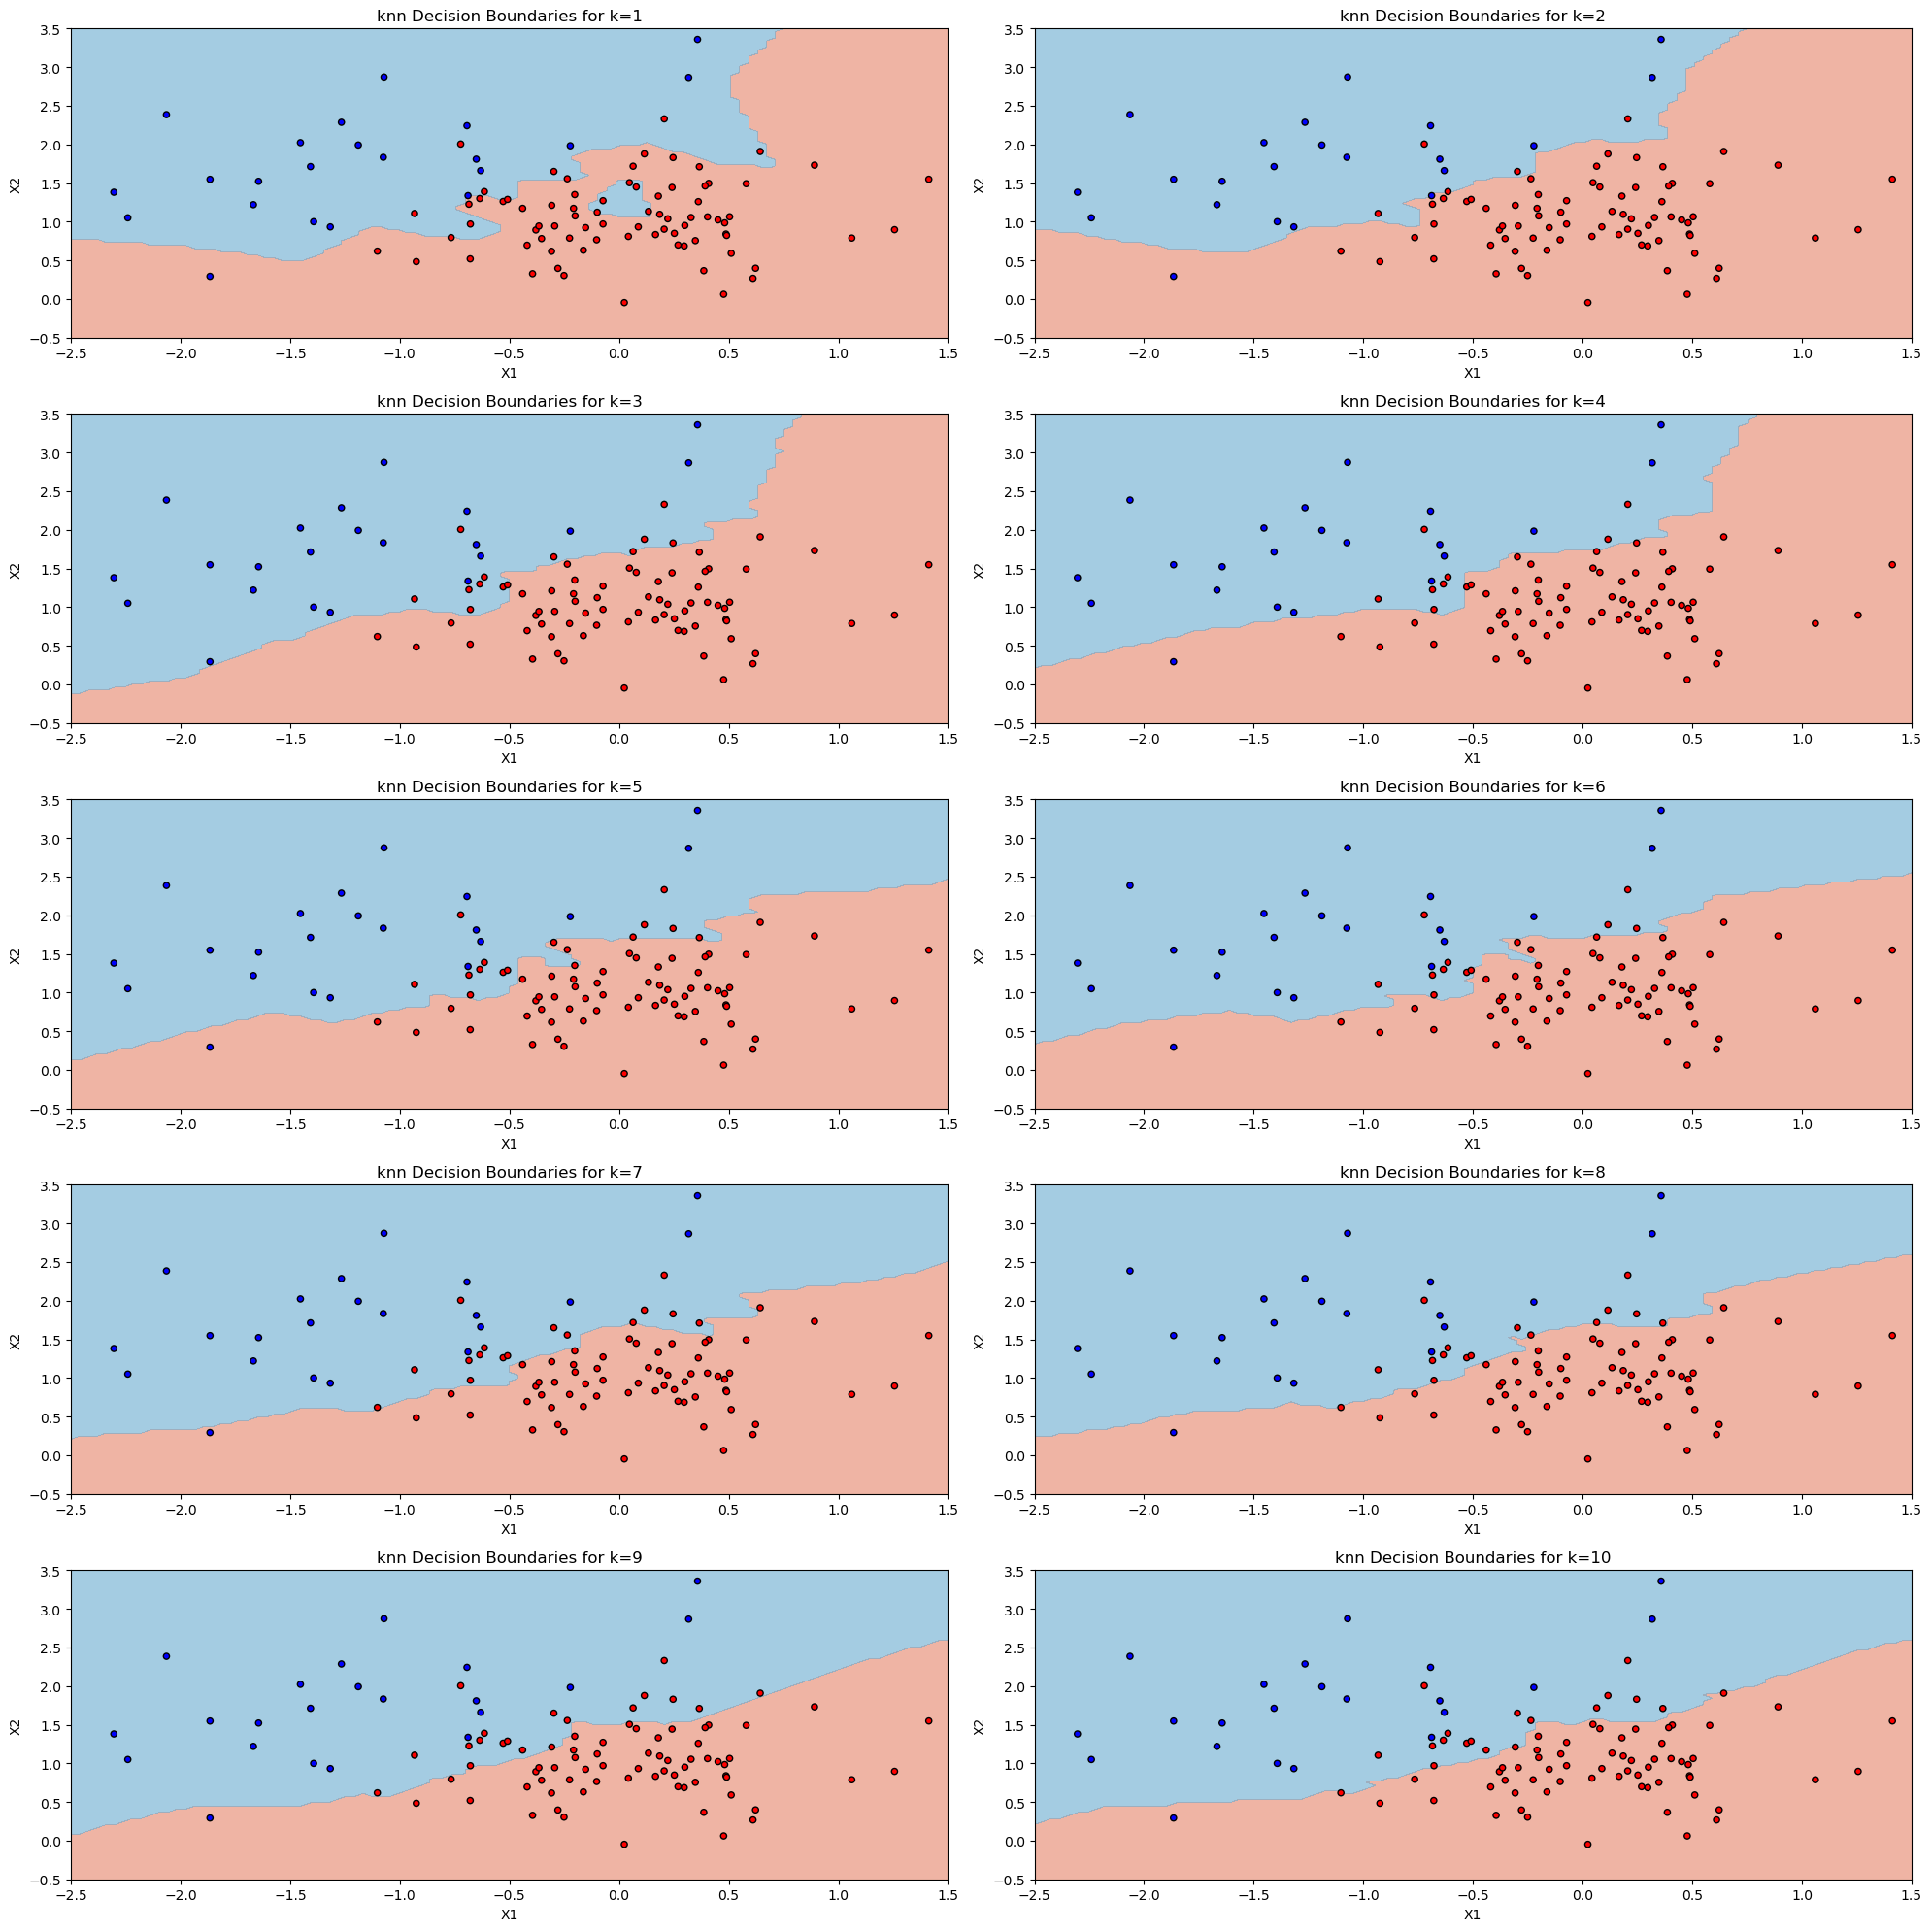

In [20]:
#do the same with knn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn(X_train,y_train,X_test,y_test,k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_test=knn.predict(X_test)
    return pred_test

def knn_error(pred,y_test):
    return 1-accuracy_score(pred,y_test)

#draw the repartition on the grid for k=1,2,3,4,5,6 with subplot
plt.figure(figsize=(20,20))
for i in range(1,11):
    plt.subplot(5,2,i)
    pred_test=knn(X_train,y_train,grid,y_test,i)
    pred_test=pred_test.reshape(Nx2, Nx1)
    plt.contourf(x1, x2, pred_test, levels=np.arange(np.min(pred_test)-0.5, np.max(pred_test)+1.5, 1), cmap='RdBu', alpha=0.6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=20)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('knn Decision Boundaries for k='+str(i))
    plt.tight_layout()
    print("error for k=",i,"is",round(knn_error(knn(X_train,y_train,X_test,y_test,i),y_test),3))
plt.show()

En comparant au knn, on peut voir que lorsque que k augmente, la frontière tend à se lisser et tends vers celle de la LDA mais n'est jamais totalement linéaire. On peut aussi souligner qu'il exitse un k optimal et que cette méthode nécessite de le rechercher auparavant, on obtient avec celui-ci une erreur très légèrement meilleur qu'avec la LDA et la QDA ici.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




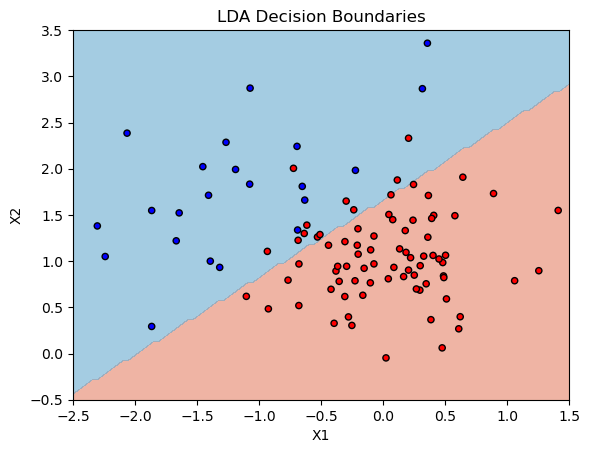

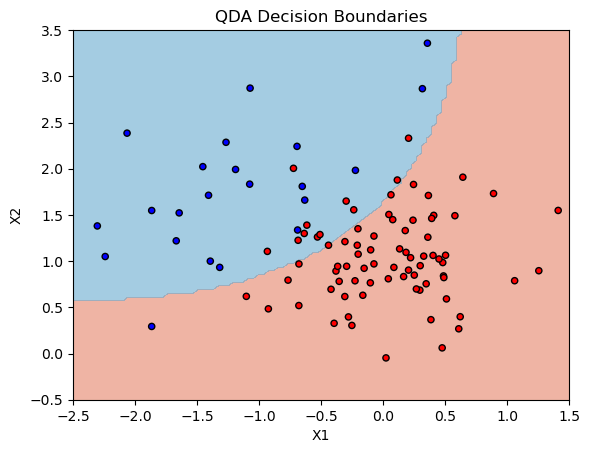

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create and fit LDA and QDA models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

# Predict on the grid points
pred_lda = lda.predict(grid)
pred_qda = qda.predict(grid)

# Reshape the predictions for contour plotting
pred_lda = pred_lda.reshape(Nx2, Nx1)
pred_qda = pred_qda.reshape(Nx2, Nx1)

# Create a contour plot for LDA decision boundaries
plt.contourf(x1, x2, pred_lda, levels=np.arange(np.min(pred_lda)-0.5, np.max(pred_lda)+1.5, 1), cmap='RdBu', alpha=0.6)

# Overlay the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundaries')
plt.show()

# Create a contour plot for QDA decision boundaries
plt.contourf(x1, x2, pred_qda, levels=np.arange(np.min(pred_qda)-0.5, np.max(pred_qda)+1.5, 1), cmap='RdBu', alpha=0.6)

# Overlay the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundaries')
plt.show()


In [21]:
from sklearn.metrics import accuracy_score

# Predict on the training and test data using LDA and QDA
pred_train_lda = lda.predict(X_train)
pred_test_lda = lda.predict(X_test)

pred_train_qda = qda.predict(X_train)
pred_test_qda = qda.predict(X_test)

# Compute the error rates for LDA and QDA on the training and test data
error_train_lda = 1 - accuracy_score(y_train, pred_train_lda)
error_test_lda = 1 - accuracy_score(y_test, pred_test_lda)

error_train_qda = 1 - accuracy_score(y_train, pred_train_qda)
error_test_qda = 1 - accuracy_score(y_test, pred_test_qda)

print("LDA Error Rate (Train):", round(error_train_lda,3))
print("LDA Error Rate (Test):", round(error_test_lda,3))
print("QDA Error Rate (Train):", round(error_train_qda,3))
print("QDA Error Rate (Test):", round(error_test_qda,3))


LDA Error Rate (Train): 0.03
LDA Error Rate (Test): 0.055
QDA Error Rate (Train): 0.05
QDA Error Rate (Test): 0.05


Nous obtenons des frontières très similaires, il semble que la version sklearn performe légèrement mieux que nos versions faites à la main.

Dans cette exemple, la QDA et la LDA ont assez bien fonctionné car les données étaient bien séparable linéairement et 'quadratiquement' mais avec une autre distribution cela n'aurait peut êtrepas été le cas. Aussi nous avons travaillé avec un exemple simple, de faible dimension. Nous avons certainement aussi la chance d'avoir comme utilisé comme hypothèse dans le cours que $P(x|C_k)$ suivent une loi normale.